In [7]:
import torch

x_train = torch.tensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]], dtype=torch.float)
y_train = torch.tensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]], dtype=torch.float)

W = torch.randn(1, 1)
b = torch.randn(1, 1)

lr = 1.0

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)

    h = torch.sigmoid(torch.mm(x_train, W) + b)

    cost = torch.mean( -y_train * torch.log(h)
                     -(1 - y_train) * torch.log(1 - h))
    
    cost.backward()

    with torch.no_grad():
        W = W - lr * W.grad
        b = b - lr * b.grad

        if epoch % 100 == 0:
            print(f"W: {W}, b: {b}, cost: {cost}")

W: tensor([[0.3088]]), b: tensor([[0.1771]]), cost: 0.937829315662384
W: tensor([[-1.4503]]), b: tensor([[4.4039]]), cost: 0.4202840030193329
W: tensor([[-1.8979]]), b: tensor([[5.7721]]), cost: 0.3987405598163605
W: tensor([[-2.1740]]), b: tensor([[6.6084]]), cost: 0.3908288776874542
W: tensor([[-2.3671]]), b: tensor([[7.1908]]), cost: 0.38701316714286804
W: tensor([[-2.5104]]), b: tensor([[7.6219]]), cost: 0.3849268853664398
W: tensor([[-2.6206]]), b: tensor([[7.9527]]), cost: 0.38370028138160706
W: tensor([[-2.7073]]), b: tensor([[8.2124]]), cost: 0.3829445540904999
W: tensor([[-2.7765]]), b: tensor([[8.4197]]), cost: 0.3824634253978729
W: tensor([[-2.8324]]), b: tensor([[8.5871]]), cost: 0.3821497857570648
W: tensor([[-2.8780]]), b: tensor([[8.7235]]), cost: 0.38194167613983154
W: tensor([[-2.9155]]), b: tensor([[8.8354]]), cost: 0.38180169463157654
W: tensor([[-2.9464]]), b: tensor([[8.9276]]), cost: 0.38170647621154785
W: tensor([[-2.9719]]), b: tensor([[9.0041]]), cost: 0.381641

In [8]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?
with torch.no_grad():

    x_test = torch.tensor([[4.5], [1.1]], dtype=torch.float)
    h_test = torch.sigmoid(torch.mm(x_test, W) + b) # h_test[h_test > 0.5] = 1; h_test[h_test <= 0.5] = 0
    print(h_test)

tensor([[0.0104],
        [0.9975]])


In [5]:
# optimizer
x_train = torch.tensor([[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]], dtype=torch.float)
y_train = torch.tensor([[1],[1],[1],[0],[0],[0],[0],[1],[0],[1],[1],[1]], dtype=torch.float)

W = torch.randn(1, 1, requires_grad=True)
b = torch.randn(1, 1, requires_grad=True)

optim = torch.optim.SGD([W,b], lr=1.0)

for epoch in range(3001):
    h = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean( -y_train * torch.log(h)
                     -(1 - y_train) * torch.log(1 - h))

    optim.zero_grad() # 기울기 초기화
    cost.backward()   # 기울기 계산
    optim.step()      # 갱신

    with torch.no_grad():
        if epoch % 100 == 0:
            print(f"W: {W.item()}, b: {b.item()}, cost: {cost}")


W: -0.33479630947113037, b: -0.7734742164611816, cost: 1.096813678741455
W: -1.4186838865280151, b: 4.306493759155273, cost: 0.42236030101776123
W: -1.8804033994674683, b: 5.718951225280762, cost: 0.3993567228317261
W: -2.16225528717041, b: 6.573095798492432, cost: 0.3911014497280121
W: -2.3585805892944336, b: 7.165259838104248, cost: 0.3871554136276245
W: -2.5039992332458496, b: 7.602623462677002, cost: 0.3850080668926239
W: -2.6156208515167236, b: 7.937692642211914, cost: 0.3837493360042572
W: -2.7033066749572754, b: 8.200549125671387, cost: 0.38297533988952637
W: -2.773308038711548, b: 8.41018009185791, cost: 0.38248327374458313
W: -2.829852819442749, b: 8.57938003540039, cost: 0.38216283917427063
W: -2.8759288787841797, b: 8.717170715332031, cost: 0.38195040822029114
W: -2.9137327671051025, b: 8.830168724060059, cost: 0.3818075358867645
W: -2.944915771484375, b: 8.923341751098633, cost: 0.381710410118103
W: -2.97074556350708, b: 9.000494956970215, cost: 0.3816438615322113
W: -2.992

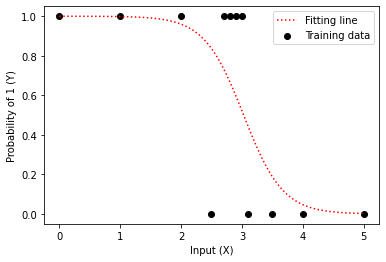

In [17]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

with torch.no_grad():
    plt.scatter(x_train, y_train, c="black", label="Training data")

    x_tmp = torch.linspace(0, 5, 100).unsqueeze(1)
    y_tmp = torch.sigmoid(torch.mm(x_tmp, W) + b)
    plt.plot(x_tmp, y_tmp, ":r", label="Fitting line")
    plt.legend()
    plt.xlabel("Input (X)")
    plt.ylabel("Probability of 1 (Y)")
    plt.show()

In [18]:
# Logistic Regression with sklearn
from sklearn.linear_model import LogisticRegression

x_train = [[1],[2],[3],[4],[5],[2.5],[3.5],[0],[3.1],[2.7],[2.8],[2.9]]
y_train = [1,1,1,0,0,0,0,1,0,1,1,1]

model = LogisticRegression(penalty = 'none')
model.fit(x_train,  y_train)

print(model.coef_, model.intercept_)

x_test = [[4.5], [1.1]]
test_result = model.predict(x_test)
print(test_result)

[[-3.10385806]] [9.39776831]
[0 1]
